# Importação bibliotecas
* `Pandas` é uma biblioteca para uso em Python, open-source e de uso gratuito (sob uma licença BSD), que fornece ferramentas para análise e manipulação de dados. É derivado de panel data (dados em painel), um termo de econometria para conjuntos de dados estruturados. O surgimento da biblioteca, no início de 2008, começou devido a insatisfação de McKinney de obter uma ferramenta de processamento de dados de alto desempenho, com recursos flexíveis de manipulação de planilhas e de banco de dados relacionais. É uma Serie é uma matriz unidimensional que contém uma sequência de valores que apresentam uma indexação (que podem ser numéricos inteiros ou rótulos), muito parecida com uma única coluna no Excel.
* `NumPy` é uma biblioteca para a linguagem Python com funções para se trabalhar com computação numérica. Seu principal objeto é o vetor n-dimensional, ou ndarray. Um vetor n-dimensional também é conhecido pelo nome tensor. A principal característica do ndarray é que ele deve ser homogêneo, ou seja, diferentemente do objeto lista, todos os seus elementos devem ser do mesmo tipo.
* `Matplotlib` é uma biblioteca de software para criação de gráficos e visualizações de dados em geral, feita para e da linguagem de programação Python e sua extensão de matemática NumPy. Oferece uma interface de programação orientada a objetos para incluir gráficos em aplicações usando toolkits de interface gráfica, como Tkinter, WxPython, Qt ou GTK.
* `Seaborn` é uma biblioteca que atua em cima do matplotlib e ajuda a melhorar o visual dos gráficos, dando uma aparência mais bem acabada. É mais voltada para essa área de estatística.
* O método `datetime` strftime(formato), que retorna uma string representando a data e a hora, de acordo com o formato passado como parâmetro. Para retornar a data como uma string no format ISO 8601, use o método datetime. isoformat() .


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from datetime import datetime


# Criação de conecxão com o endereço do arquivo no google driver.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importação do dataset conforme caminho especificado na conecxão com google driver.


In [4]:
ocorrencias = pd.read_csv('/content/drive/MyDrive/projeto 4º semestre/ocorrencias_cenipa.csv', sep=";", index_col=0)
ocorrencias.shape

(5242, 20)

* Visualização dos tipos de variaveis.

In [ ]:
ocorrencias.dtypes

tipo                                 object
descricao                            object
cidade                               object
estado                               object
data                         datetime64[ns]
ano                                   int64
hora                                 object
aeronave_liberada                    object
status_investigacao                  object
aeronaves_envolvidas                  int64
ocorrencia_saida_pista               object
aeronave_tipo                        object
aeronave_fabricante                  object
motor_tipo                           object
aeronave_motor_quantidade            object
aeronave_assentos                     int64
aeronave_ano_fabricacao               int64
aeronave_pais_fabricante             object
aeronave_fase_operacao               object
aeronave_nivel_dano                  object
dtype: object

# Conversão do campo data de "object" para "datetime64".
* tratamento dos dados do dataset

In [ ]:
ocorrencias['data'] = pd.to_datetime(ocorrencias['data'], format='%d/%m/%Y')

# Tratamento de dados
* Substituindo os espaços nos cabeçalhos das colunas do dataset por underline. 

In [ ]:
ocorrencias.columns = [c.replace(' ', '_') for c in ocorrencias.columns]

display(ocorrencias.head())


,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
codigo,,,,,,,,,,,,,,,,,,,,
40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,1,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,1,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,1,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


# Grafico boxplot com media, moda e mediana de assentos, com os outler.

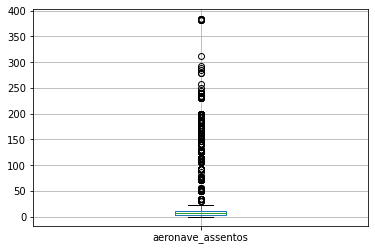

<Figure size 720x720 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

ocorrencias.boxplot(column ='aeronave_assentos')
plt.figure(figsize=(10, 10))
plt.show()

#frenquencias de ocorrencia por estado sendo especificado em um unico estado "ACRE"

In [ ]:
acre = ocorrencias[['estado', 'cidade', 'tipo']]


occ_cidade =acre['estado']=='AC'
filtro_Ac = acre[occ_cidade]
print(filtro_Ac)



       estado                cidade             tipo
codigo                                              
40207      AC       CRUZEIRO DO SUL        INCIDENTE
40273      AC            RIO BRANCO        INCIDENTE
40295      AC            RIO BRANCO        INCIDENTE
40310      AC       CRUZEIRO DO SUL        INCIDENTE
39913      AC       CRUZEIRO DO SUL  INCIDENTE GRAVE
41579      AC   SANTA ROSA DO PURUS        INCIDENTE
41976      AC            RIO BRANCO        INCIDENTE
43702      AC            RIO BRANCO         ACIDENTE
43711      AC            RIO BRANCO        INCIDENTE
44078      AC  MARECHAL THAUMATURGO         ACIDENTE
44859      AC            RIO BRANCO        INCIDENTE
44882      AC              TARAUACÁ        INCIDENTE
44974      AC            RIO BRANCO        INCIDENTE
45237      AC      SENADOR GUIOMARD  INCIDENTE GRAVE
45447      AC            RIO BRANCO        INCIDENTE
45706      AC            RIO BRANCO        INCIDENTE
45728      AC            RIO BRANCO        INC

* Classificado a coluna tipo do dataframe

In [ ]:
display(ocorrencias['tipo'].unique())

array(['ACIDENTE', 'INCIDENTE GRAVE', 'INCIDENTE'], dtype=object)

# Media de ocorrencias de 2010 até 2019 classificadas por tipo
* Grafico das medias de ocorrencias.

Text(0.5, 1.0, 'Media Ocorrencia por tipo de 2010 até 2019')

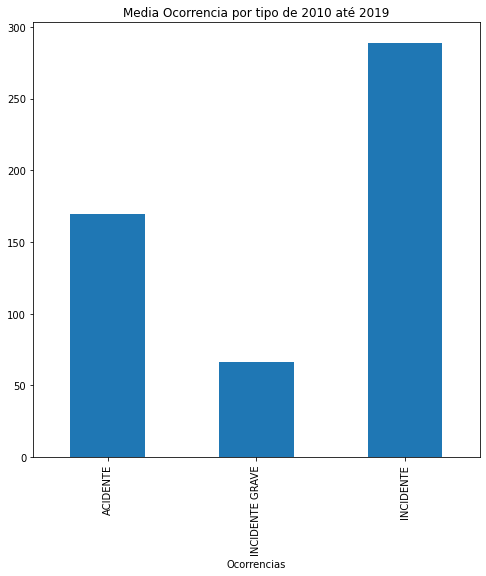

In [ ]:
Frequencia_incidentes = { }
Frequencia_incidentes['total'] = {}

for ss in ocorrencias['tipo'].unique():
    Frequencia_incidentes[ss] = {}

for inc in ocorrencias['ano'].unique():
    
    Frequencia_incidentes['total'][inc] = ocorrencias['ano'][ocorrencias['ano'] == inc].count()
    
    for ss in ocorrencias['tipo'].unique():
        
        Frequencia_incidentes[ss][inc] = ocorrencias['ano'][(ocorrencias['ano'] == inc) & (ocorrencias['tipo'] == ss)].count()

ano_tipo_oco = pd.DataFrame(Frequencia_incidentes)
ano_tipo_oco.index.name='Anos'; ano_tipo_oco.columns.name='Ocorrencias'
ano_tipo_oco = ano_tipo_oco[['ACIDENTE', 'INCIDENTE GRAVE', 'INCIDENTE']]
media_ocorencia_ano = ano_tipo_oco.mean(axis=1, skipna=True)
media_ocorencia = ano_tipo_oco.mean(axis=0, skipna=True)
media_ocorencia.plot.bar(figsize=(8,8))
plt.title('Media Ocorrencia por tipo de 2010 até 2019')


# Ocorrencia por estado entre 2010 e 2019
* Grafico com de ocorrencias por estado.

In [ ]:
Frequencia_ano = { }
Frequencia_ano['all'] = {}

for s in ocorrencias['estado'].unique():
    Frequencia_ano[s] = {}

for occ in ocorrencias['ano'].unique():
    
    Frequencia_ano['all'][occ] = ocorrencias['ano'][ocorrencias['ano'] == occ].count()

    for s in ocorrencias['estado'].unique():
        
        Frequencia_ano[s][occ] = ocorrencias['ano'][(ocorrencias['ano'] == occ) & (ocorrencias['estado'] == s)].count()

ano_frequencia = pd.DataFrame(Frequencia_ano)

ano_frequencia = ano_frequencia['all']
ano_frequencia = ano_frequencia.count()
ano_frequencia = int(ano_frequencia)




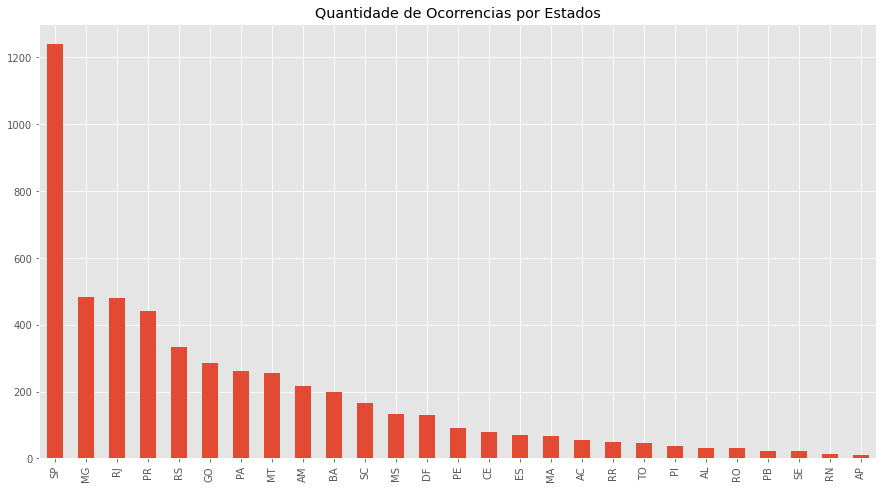

In [ ]:
plt.style.use("ggplot")
ano_frequencia_bar = ocorrencias['estado'].value_counts().plot(kind='bar',
                                                         subplots=True,
                                                         label='Quantidade de Ocorrencias por Estados',
                                                         figsize=(15,8))

# Total de ocorrencias por estado entre 2010 e 2019

In [ ]:
oco_estado = {}


for occ in ocorrencias['estado'].unique():
  ano_tipo_oco.mean(axis=1, skipna=True)
  print(str(occ) + ':' + str(ocorrencias['estado'][ocorrencias['estado'] == occ].count()))


PA:263
PR:441
MS:132
GO:286
RS:334
MG:482
AM:217
TO:46
RJ:480
AC:54
SP:1239
SC:166
MT:255
BA:200
PE:90
DF:129
CE:78
ES:70
MA:68
RR:49
AP:9
AL:30
RO:30
SE:21
PB:23
PI:36
RN:14


# Incidencia de ocorrencias de 2010 a 2019 classificadas por tipo de motor

In [ ]:
tipo_moto = ocorrencias['motor_tipo'].head().count()

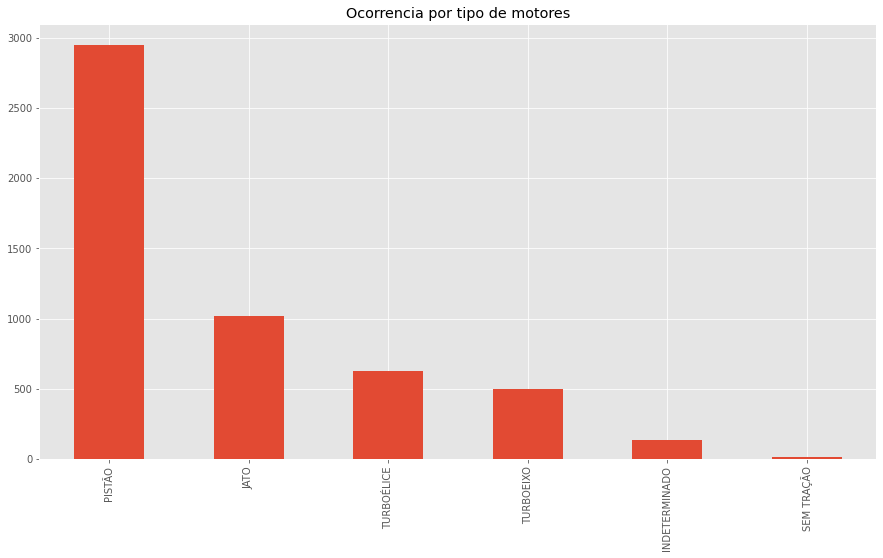

In [ ]:
plt.style.use("ggplot")
tipos_motor = ocorrencias['motor_tipo'].value_counts().plot(kind='bar',
                                                         subplots=True,
                                                         label='Ocorrencia por tipo de motores',
                                                         figsize=(15,8))

* Percentual de ocorrencias por tipo, e seus percentuais.

Text(0.5, 1.0, 'Percentual de classificação por tipo entre 2010 e 2019')

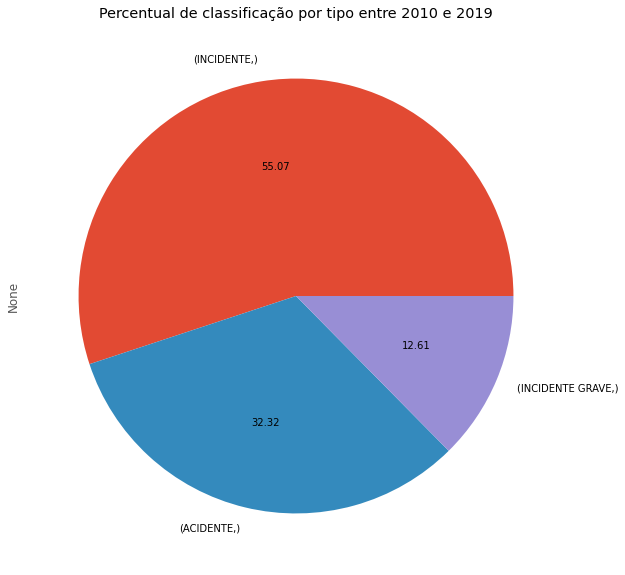

In [ ]:
tipo_occ = ocorrencias[['tipo']].value_counts()
tipo_occ.plot.pie(autopct='%1.2f',figsize=(10,10))
plt.title("Percentual de classificação por tipo entre 2010 e 2019")

# Media, Mediana, Moda de Idade das arenaves corelacionada por tipo de "Incidente,Incidente Grave, Acidente"
* com boxplot mostrado suas incidencias "media, mediana, min, max, total"

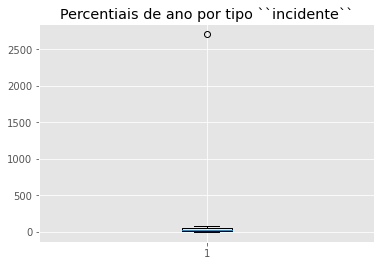

In [ ]:
tipo_occ_ano_erona = ocorrencias[['tipo', 'aeronave_ano_fabricacao']]
tipo_occ_ano_erona = tipo_occ_ano_erona['tipo'] == 'INCIDENTE'
tipo_occ_ano_erona = ocorrencias[tipo_occ_ano_erona]
tipo_occ_remove = tipo_occ_ano_erona.loc[(tipo_occ_ano_erona['aeronave_ano_fabricacao'] == 0)]
ult_tipo = tipo_occ_ano_erona.drop(tipo_occ_remove.index)
ult_tipo['idade_aeronave'] = 2021 - ult_tipo['aeronave_ano_fabricacao']
final_inci = ult_tipo['idade_aeronave'].describe()
plt.boxplot(final_inci)
plt.title("Percentiais de ano por tipo Incidente")
plt.show()

count     631.000000
mean       19.559429
std       319.261448
min     -7978.000000
25%        18.000000
50%        33.000000
75%        43.000000
max        81.000000
Name: idade_aeronave, dtype: float64


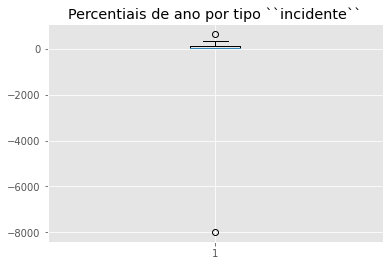

In [ ]:
tipo_occ_ano_erona = ocorrencias[['tipo', 'aeronave_ano_fabricacao']]
tipo_occ_ano_erona = tipo_occ_ano_erona['tipo'] == 'INCIDENTE GRAVE'
tipo_occ_ano_erona = ocorrencias[tipo_occ_ano_erona]
tipo_occ_remove = tipo_occ_ano_erona.loc[(tipo_occ_ano_erona['aeronave_ano_fabricacao'] == 0)]
ult_tipo = tipo_occ_ano_erona.drop(tipo_occ_remove.index)
ult_tipo['idade_aeronave'] = 2021 - ult_tipo['aeronave_ano_fabricacao']
final_incidente_grave = ult_tipo['idade_aeronave'].describe()
print(final_incidente_grave)
plt.boxplot(final_incidente_grave)
plt.title("Percentiais de ano por tipo Incidente Grave")
plt.show()

count    1561.000000
mean       31.273543
std        16.082165
min         4.000000
25%        16.000000
50%        31.000000
75%        44.000000
max        85.000000
Name: idade_aeronave, dtype: float64


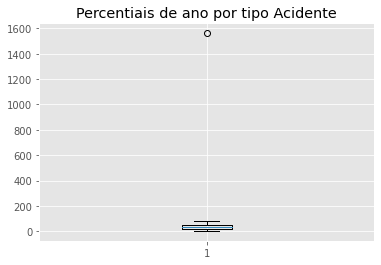

In [ ]:
tipo_occ_ano_erona = ocorrencias[['tipo', 'aeronave_ano_fabricacao']]
tipo_occ_ano_erona = tipo_occ_ano_erona['tipo'] == 'ACIDENTE'
tipo_occ_ano_erona = ocorrencias[tipo_occ_ano_erona]
tipo_occ_remove = tipo_occ_ano_erona.loc[(tipo_occ_ano_erona['aeronave_ano_fabricacao'] == 0)]
ult_tipo = tipo_occ_ano_erona.drop(tipo_occ_remove.index)
ult_tipo['idade_aeronave'] = 2021 - ult_tipo['aeronave_ano_fabricacao']
final_acidentes = ult_tipo['idade_aeronave'].describe()
print(final_acidentes)
plt.boxplot(final_acidentes)
plt.title("Percentiais de ano por tipo Acidente")
plt.show()

In [5]:
aeroano = ocorrencias['aeronave_ano_fabricacao'] 

In [7]:
aeroano.median()

1992.0

In [14]:
aeroanoval = aeroano.value_counts()

In [41]:
aeroanoval.rank()

0       79.0
2008    78.0
2010    77.0
2009    76.0
2011    75.0
        ... 
1956     3.5
1954     3.5
1940     3.5
9999     3.5
1942     3.5
Name: aeronave_ano_fabricacao, Length: 79, dtype: float64

In [95]:
aeroval_remove = aeroanoval.loc[(aeroanoval == 0)]
aeroanoval = aeroanoval.drop(aeroval_remove.index)

In [96]:
aeroanoidx = aeroanoval.head(10)

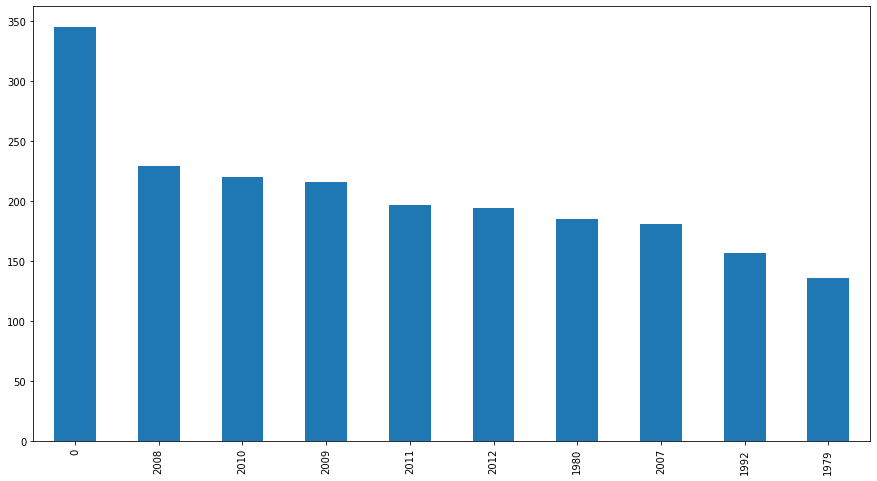

In [97]:
aeroanoidx.plot.bar("ggplot", figsize=(15,8))

In [29]:
aerofab_coluna_oco = ocorrencias['aeronave_fabricante']
aerofab_coluna_oco

codigo
40107    NEIVA INDUSTRIA AERONAUTICA
40147                 PIPER AIRCRAFT
40148                CESSNA AIRCRAFT
40149                        XAVANTE
40150                 BEECH AIRCRAFT
                    ...             
79117        FABRICANTE DESCONHECIDO
79119        FABRICANTE DESCONHECIDO
79123                  INDETERMINADO
79203                CESSNA AIRCRAFT
79227                 PIPER AIRCRAFT
Name: aeronave_fabricante, Length: 5242, dtype: object

In [30]:
aerofab_valor = aerofab_coluna_oco.value_counts()

In [46]:
aerofab_valor.rank()

CESSNA AIRCRAFT                   223.0
EMBRAER                           222.0
NEIVA INDUSTRIA AERONAUTICA       221.0
PIPER AIRCRAFT                    220.0
INDETERMINADO                     219.0
                                  ...  
NILSON SULZBACH PERES              69.5
ANTONIO ETTORE NALLIN              69.5
GUIMBAL                            69.5
SERGIO MAURO                       69.5
DANIEL DO PRADO FERREIRA PINTO     69.5
Name: aeronave_fabricante, Length: 223, dtype: float64

In [47]:
h_aerofab_valor = aerofab_valor.head(10)

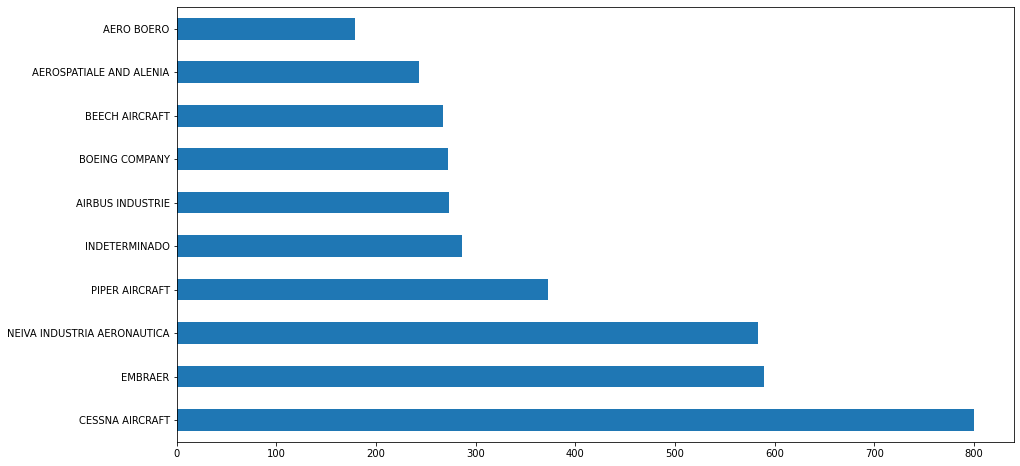

In [81]:
h_aerofab_valor.plot.barh('ggplot',figsize=(15,8))

In [59]:
motorNum_coluna_oco = ocorrencias['aeronave_motor_quantidade']
motorNum_coluna_oco


codigo
40107        MONOMOTOR
40147          BIMOTOR
40148        MONOMOTOR
40149        MONOMOTOR
40150        MONOMOTOR
             ...      
79117    INDETERMINADO
79119    INDETERMINADO
79123       SEM TRAÇÃO
79203        MONOMOTOR
79227          BIMOTOR
Name: aeronave_motor_quantidade, Length: 5242, dtype: object

In [60]:
vmotorNum_coluna_oco = motorNum_coluna_oco.value_counts()

In [61]:
vmotorNum_coluna_oco.rank()

MONOMOTOR        6.0
BIMOTOR          5.0
SEM TRAÇÃO       4.0
TRIMOTOR         3.0
INDETERMINADO    2.0
QUADRIMOTOR      1.0
Name: aeronave_motor_quantidade, dtype: float64

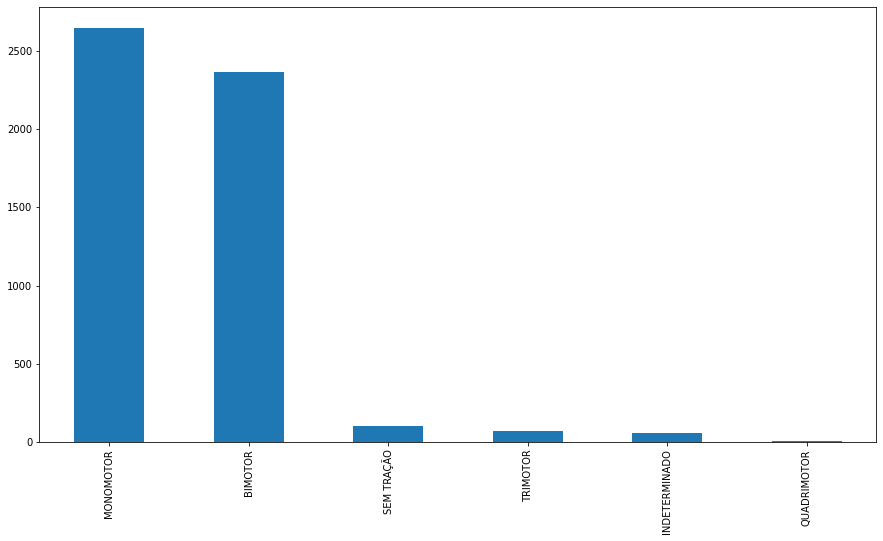

In [79]:
vmotorNum_coluna_oco.plot.bar('ggplot',figsize=(15,8))

In [66]:
aeroPais_coluna_oco = ocorrencias['aeronave_pais_fabricante']
aeroPais_coluna_oco


codigo
40107    BRASIL
40147    BRASIL
40148    BRASIL
40149    BRASIL
40150    BRASIL
          ...  
79117    BRASIL
79119    BRASIL
79123    BRASIL
79203    BRASIL
79227    BRASIL
Name: aeronave_pais_fabricante, Length: 5242, dtype: object

In [67]:
vaeropais = aeroPais_coluna_oco.value_counts()

In [70]:
vaeropais.rank()

BRASIL              20.0
ESTADOS UNIDOS      19.0
NÃO IDENTIFICADO    18.0
PARAGUAI            17.0
PORTUGAL            15.5
CHILE               15.5
BOLÍVIA             14.0
ALEMANHA            12.5
ESPANHA             12.5
PANAMÁ               9.5
ARGENTINA            9.5
COLÔMBIA             9.5
FRANÇA               9.5
ITÁLIA               4.0
URUGUAI              4.0
POLÔNIA              4.0
CINGAPURA            4.0
VENEZUELA            4.0
ÁFRICA DO SUL        4.0
SUIÇA                4.0
Name: aeronave_pais_fabricante, dtype: float64

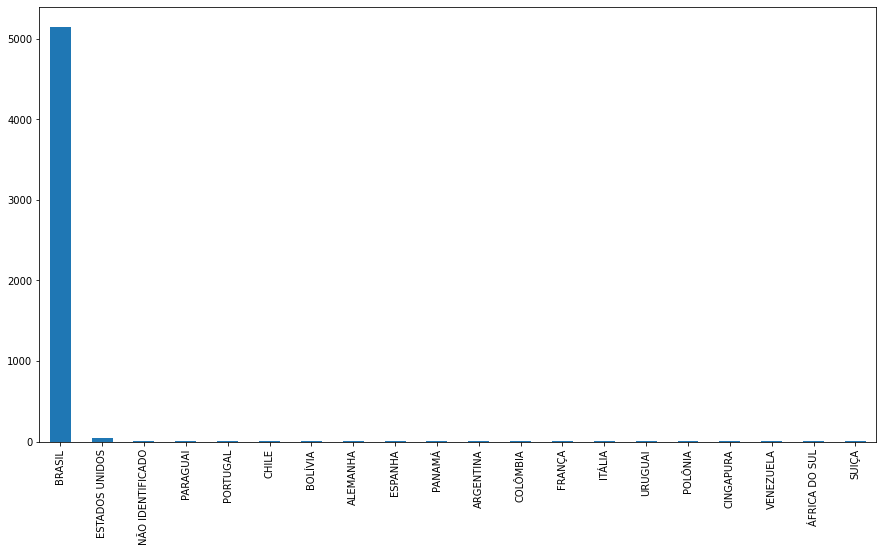

In [80]:
vaeropais.plot.bar('ggplot',figsize=(15,8))

In [71]:
aerodano = ocorrencias['aeronave_nivel_dano']

In [75]:
vaerodano = aerodano.value_counts()

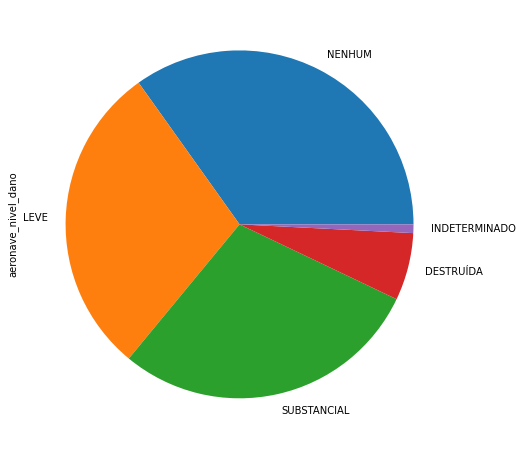

In [77]:
vaerodano.plot.pie(figsize=(15,8))

In [99]:
aerotipo = ocorrencias['aeronave_tipo']
aerotipo

codigo
40107            AVIÃO
40147            AVIÃO
40148            AVIÃO
40149            AVIÃO
40150            AVIÃO
             ...      
79117    INDETERMINADO
79119    INDETERMINADO
79123            TRIKE
79203            AVIÃO
79227            AVIÃO
Name: aeronave_tipo, Length: 5242, dtype: object

In [100]:
vaerotipo = aerotipo.value_counts()

In [101]:
vaerotipo.rank()

AVIÃO            10.0
HELICÓPTERO       9.0
ULTRALEVE         8.0
INDETERMINADO     7.0
PLANADOR          6.0
ANFÍBIO           5.0
TRIKE             4.0
HIDROAVIÃO        2.0
BALÃO             2.0
DIRIGÍVEL         2.0
Name: aeronave_tipo, dtype: float64

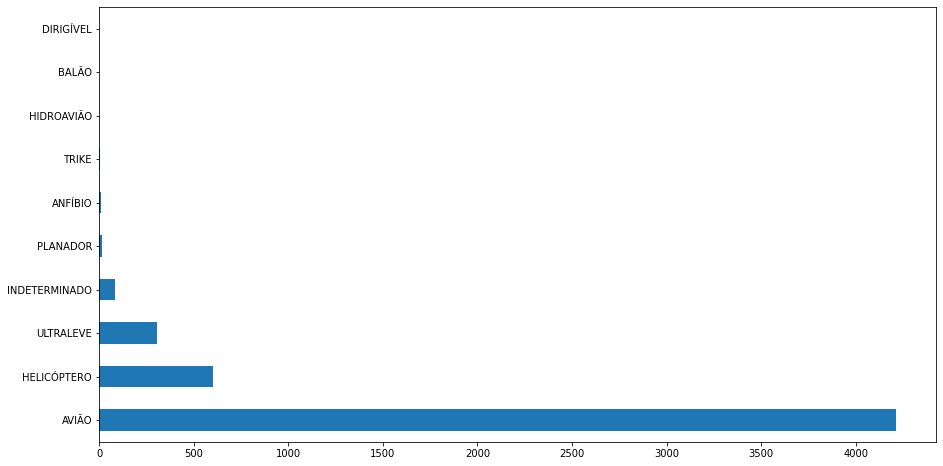

In [103]:
vaerotipo.plot.barh(figsize=(15,8))

# Conclusão

 Ciência de dados é uma área interdisciplinar voltada para o estudo e a análise de dados econômicos, financeiros e sociais, estruturados e não-estruturados, que visa a extração de conhecimento, detecção de padrões e/ou obtenção de insights para possíveis tomadas de decisão. 


# Bibliografia
* MCKINNEY, Wes. Phyton para analise de dados: tratamento de dados com pandas, numpy e ipython. 7ª ed. São Paulo: Novatec, 2021.
* Menezes, Nilo Ney Coutinho. Introdução à programação com python: Algoritmo e lógica de programação para iniciantes. 3º ed. Novatec, 2019.
* Bruce, Peter. Estatística Prática para cientista de dados: 50 conceitos básicos. 1º ed. Rio de Janeiro, 2019.
* Python and this documentation, 2021. Disponível em: https://docs.python.org/. Acesso em 10/novembro/2021.
* Pandas DataFrame, 2021. Disponível em: https://www.w3resource.com/pandas/dataframe. Acesso em 10/novembro/2021.